# **Project 18: Bank Customer Churn Predictor**

***Pandas*** : *A Python library providing data structures and data analysis tools for handling and manipulating numerical tables and time series.*

***Seaborn*** : *A Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Warnings*** : *A Python module that provides a way to issue and control runtime warnings, typically used to alert the user of some condition in the code.*

***NumPy*** : *A fundamental package for scientific computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them.*

# **Data Loading**

**We import these modules for Data Loading , Data Cleaning, Data Visualization and Explorotory Data Analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**The warnings.simplefilter('ignore') command tells Python to ignore all warnings that would normally be issued during the runtime of the program.**

In [2]:
warnings.simplefilter('ignore')

**df = pd.read_csv('Churn_Modelling.csv'): Reads the CSV file named 'Churn_Modelling.csv' into a DataFrame named df using pandas.**

**df.head(5): Displays the first 5 rows of the DataFrame df.**

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**df.drop(['CustomerId','RowNumber','Surname'], axis='columns', inplace=True): Removes the 'CustomerId', 'RowNumber', and 'Surname' columns from the DataFrame df and updates df in place.**

**df.head(): Displays the first 5 rows of the updated DataFrame df.**

In [4]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**The command df.isnull().sum() returns the total number of missing (null) values in each column of the DataFrame df.**

In [5]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**The command df.dtypes displays the data type of each column in the DataFrame df.**

In [6]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


# **Data Visualization**

**This code creates a smaller pie chart to show customer churn:**

**1: Defines labels and sizes for the 'Exited' and 'Retained' segments.**

**2: Sets the 'Retained' segment to explode slightly.**

**3: Creates a figure and axes with reduced size.**

**4: Plots the pie chart with percentages, shadow, and a starting angle.**

**5: Ensures the chart is a circle.**

**6: Adds a title and displays the chart.**

**In this graph, we can visualize a pie chart comparing Retained customers to those who have Exited (Churned). Approximately 79% are Retained, while 20% have Churned.**

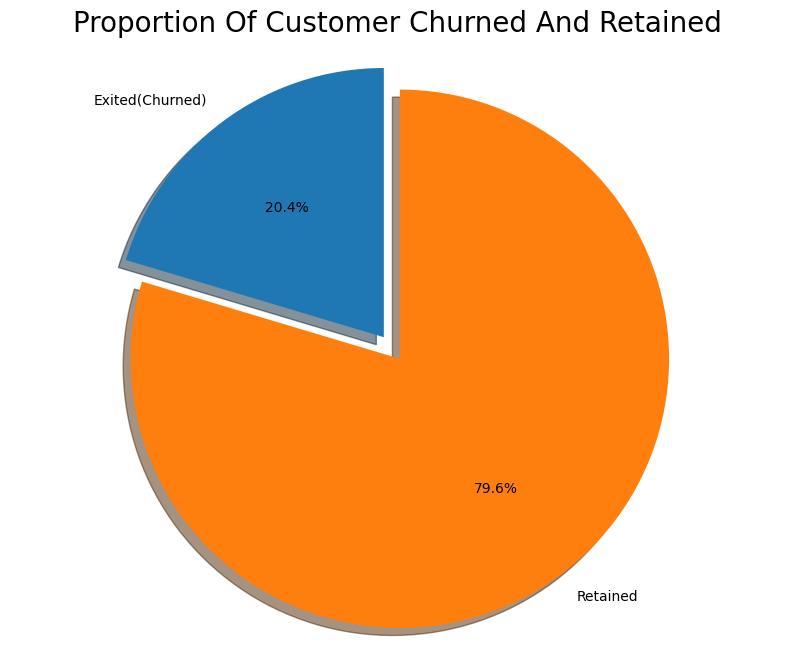

In [7]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion Of Customer Churned And Retained", size = 20)
plt.show()

**This code creates a 2x2 grid of count plots using Seaborn to visualize various categorical variables against customer churn ('Exited'):**

**1: First plot (axarr[0][0]): Counts of customers by 'Geography' with hue by 'Exited'.**

**2: Second plot (axarr[0][1]): Counts of customers by 'Gender' with hue by 'Exited'.**

**3: Third plot (axarr[1][0]): Counts of customers by 'HasCrCard' (whether they have a credit card) with hue by 'Exited'.**

**4: Fourth plot (axarr[1][1]): Counts of customers by 'IsActiveMember' (whether they are active members) with hue by 'Exited'.**

**In this graph, we can analyze the count of each category categorized by geography, gender, HasCrCard, and IsActiveMember to determine whether the employee has churned or not.**

<Axes: xlabel='IsActiveMember', ylabel='count'>

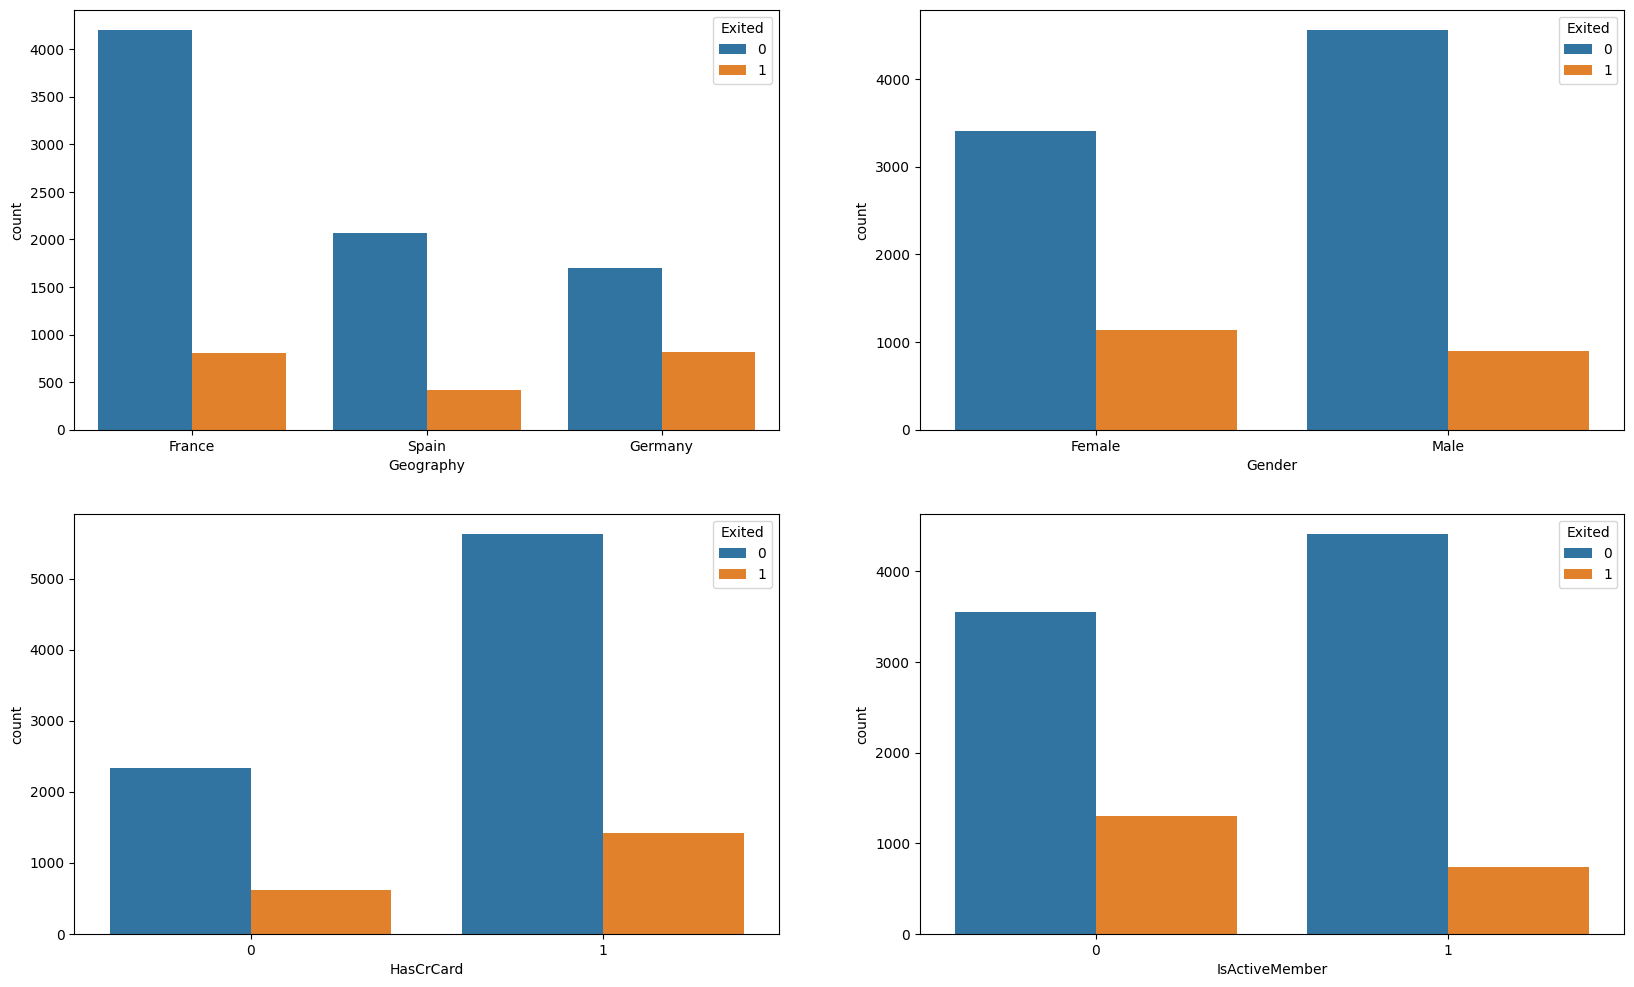

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

**This code creates a 3x2 grid of box plots using Seaborn to visualize numerical variables against customer churn ('Exited'):**

**1: First plot (axarr[0][0]): Box plot of 'CreditScore' by 'Exited' with hues differentiated by 'Exited'.**

**2: Second plot (axarr[0][1]): Box plot of 'Age' by 'Exited' with hues differentiated by 'Exited'.**

**3: Third plot (axarr[1][0]): Box plot of 'Tenure' by 'Exited' with hues differentiated by 'Exited'.**

**4: Fourth plot (axarr[1][1]): Box plot of 'Balance' by 'Exited' with hues differentiated by 'Exited'.**

**5: Fifth plot (axarr[2][0]): Box plot of 'NumOfProducts' by 'Exited' with hues differentiated by 'Exited'.**

**6: Sixth plot (axarr[2][1]): Box plot of 'EstimatedSalary' by 'Exited' with hues differentiated by 'Exited'.**

**In this graph, we create boxplots for CreditScore, Age, Tenure, Balance, NumberOfProducts, and EstimatedSalary based on whether the employee has churned or not.**

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

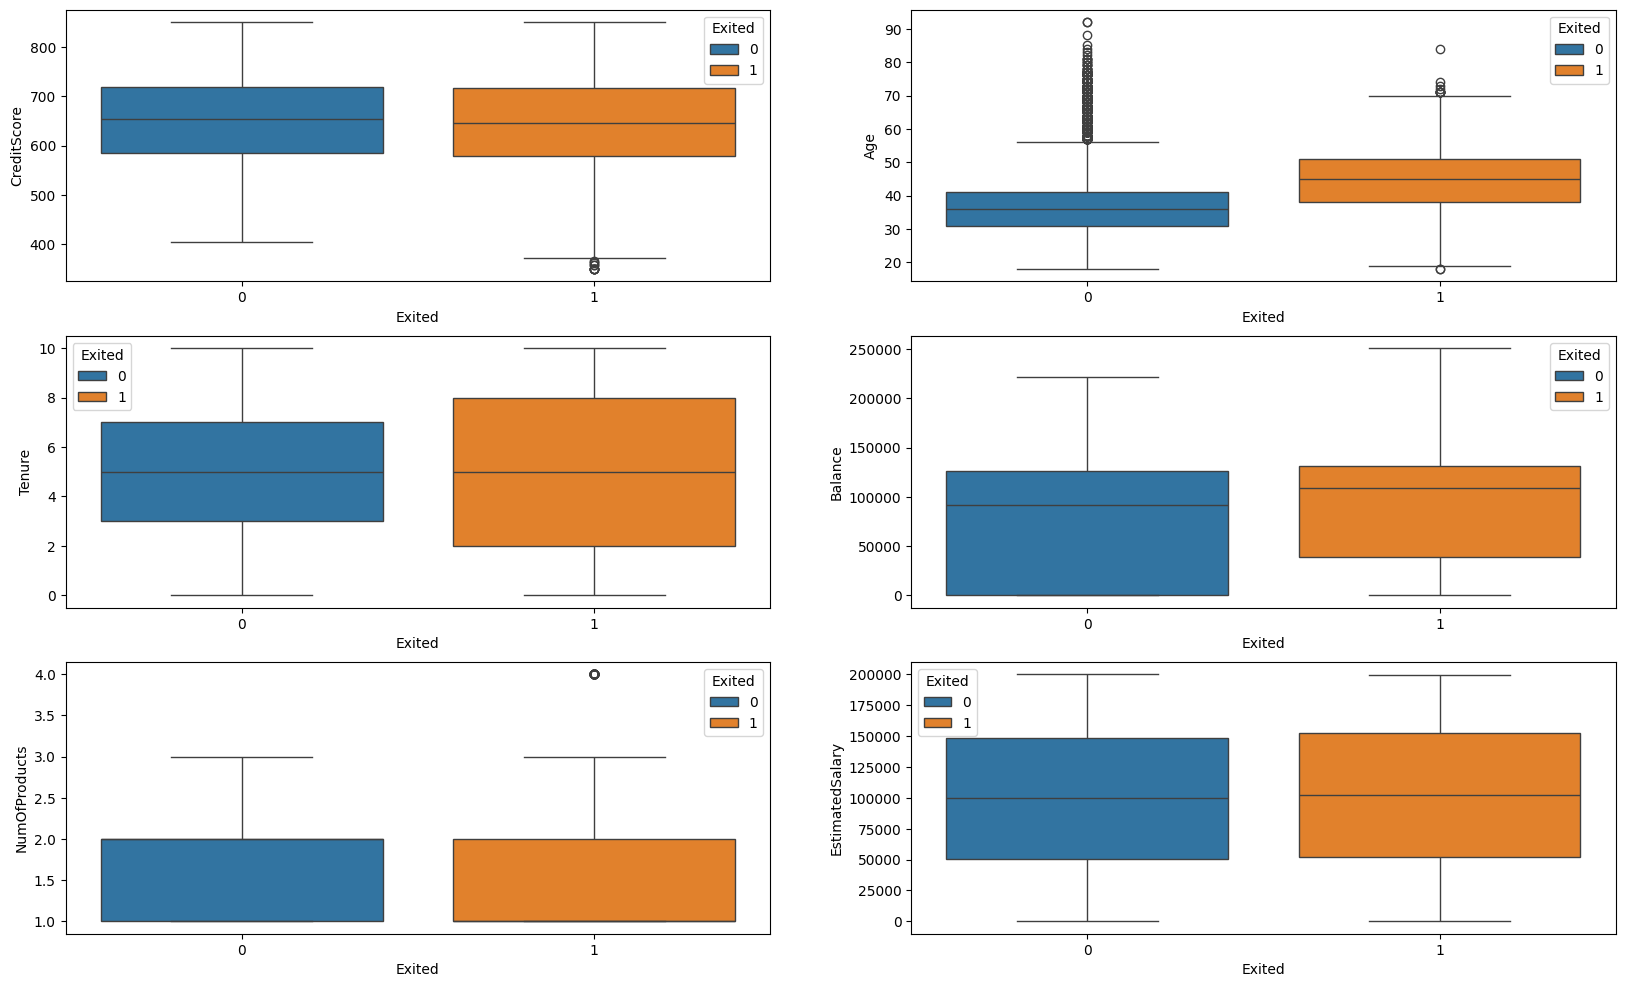

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

**This code visualizes customer churn prediction using a histogram comparing the distribution of 'Tenure' for customers who churned ('Exited=1') and those who did not churn ('Exited=0'):**

**1: tenure_churn_no = df[df.Exited==0].Tenure: Selects the 'Tenure' values for customers who did not churn.**

**2: tenure_churn_yes = df[df.Exited==1].Tenure: Selects the 'Tenure' values for customers who churned.**

**3: plt.xlabel("tenure"): Sets the label for the x-axis.**

**4: plt.ylabel("Number Of Customers"): Sets the label for the y-axis.**

**5: plt.title("Customer Churn Prediction Visualization"): Sets the title of the plot.**

**6: plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No']): Plots a histogram with 'Tenure' values for churned and non-churned customers, specifying colors and labels.**

**7: plt.legend(): Displays a legend to differentiate between churned and non-churned customers.**

**In this graph, we analyze customers who have churned versus those who have not, based on the number of customers. Additionally, we observe that approximately 1200 customers have indicated 'no' based on tenure, while around 400 customers have indicated 'yes'.**

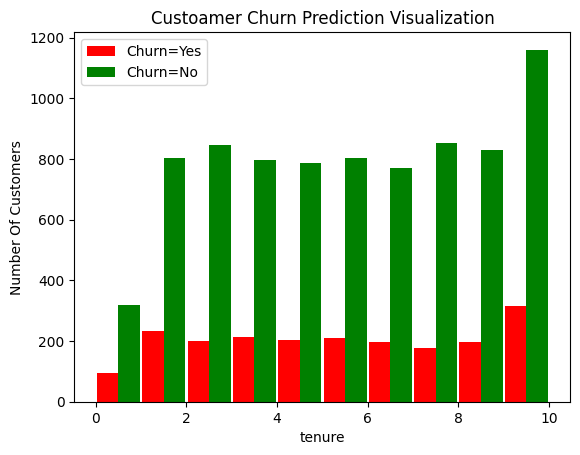

In [10]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Custoamer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

**This command displays the first 5 rows of the DataFrame df.**

In [11]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# **Data Cleaning**

**The command df["Geography"].unique() returns an array containing the unique values of the "Geography" column in the DataFrame df. This is useful for understanding all the distinct geographical locations represented in the dataset.**

In [13]:
df = pd.get_dummies(df, columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


**If the columns "Geography_France", "Geography_Germany", and "Geography_Spain" exist in df, they will be renamed to "France", "Germany", and "Spain" respectively.**

In [14]:
df.rename(columns={"Geography_France": "France", "Geography_Germany": "Germany", "Geography_Spain": "Spain"}, inplace=True)
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


**This will convert "France", "Germany", and "Spain" are binary indicators (0 or 1) after conversion.**

In [15]:
df["France"] = df["France"].astype(int)
df["Germany"] = df["Germany"].astype(int)
df["Spain"] = df["Spain"].astype(int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**The code pd.get_dummies(df, columns=['Gender']) converts the categorical variable 'Gender' into dummy/indicator variables and adds them to the DataFrame df, expanding the dataset with binary columns indicating the presence of each gender category (e.g., Male and Female).**

In [16]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,True,False


**The code renames the columns 'Gender_Female' and 'Gender_Male' in the DataFrame df to 'Female' and 'Male', respectively, and displays the first 5 rows of the updated DataFrame.**

In [17]:
df.rename(columns={"Gender_Female": "Female", "Gender_Male": "Male"}, inplace=True)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,True,False


**The code converts the columns 'Female' and 'Male' in the DataFrame df to integers, likely representing binary indicators (0 or 1) for female and male genders, respectively.**

In [18]:
df["Female"] = df["Female"].astype(int)
df["Male"] = df["Male"].astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**The command df.columns returns a list of all column names present in the DataFrame df.**

In [19]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')

**This visualization helps in understanding the relationships (correlations) between different numerical features in the dataset.**

<Axes: >

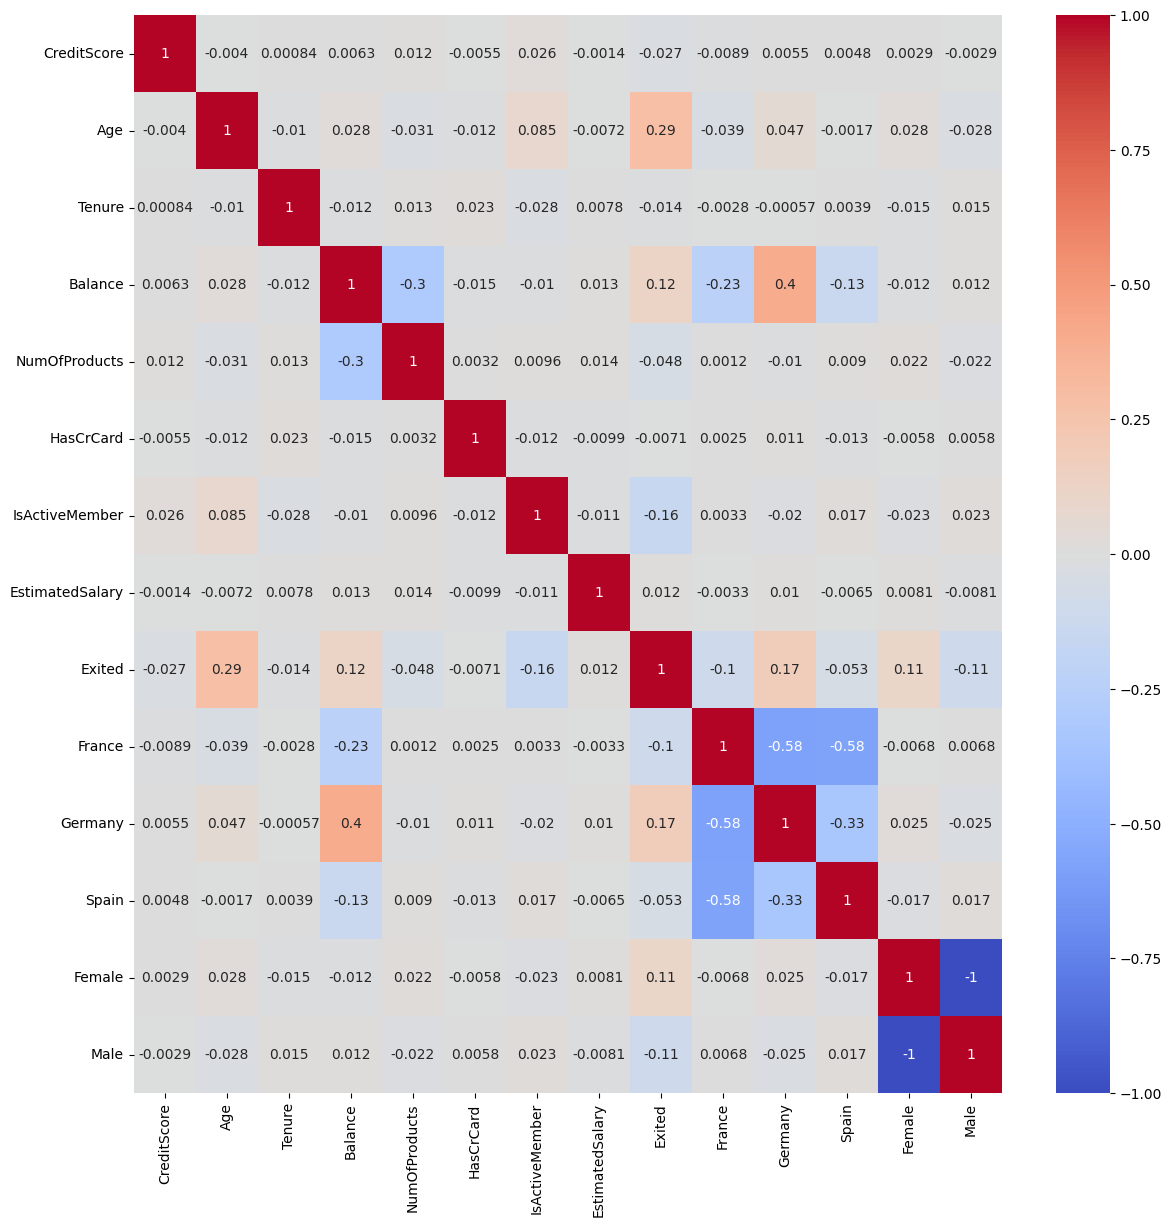

In [20]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# **Model Building**

**This setup prepares the data for machine learning tasks where X contains the features and y contains the target variable that you want to predict.**

In [21]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male']]

y = df[['Exited']]

**This code snippet normalizes the features ("X") and the target ("y") using Min-Max scaling, ensuring all values are within a specified range (typically 0 to 1) for improved model performance in machine learning tasks.**

In [22]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = 'pandas')

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = 'pandas')

y = Scaler_y.fit_transform(y)

**These imports from sklearn facilitate the splitting of data into training and testing sets (train_test_split) and the generation of a classification report (classification_report) to evaluate model performance in supervised learning tasks.**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**This code uses train_test_split from sklearn.model_selection to split the predictors (X) and the target (y) into training and testing sets (X_train, X_test, y_train, y_test) with 80% of the data allocated to training and 20% to testing by default (unless specified otherwise).**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**This code snippet performs logistic regression using LogisticRegression from sklearn.linear_model:**

**1: Logistic Regression Setup: Initializes a logistic regression model (LogReg) with parallel processing (n_jobs=-1).**

**2: Model Training: Fits the model using X_train (predictors) and y_train (target).**

**3: Prediction: Predicts the target variable (y_pred) using X_test.**

**4: Evaluation: Generates a classification report (CR) using classification_report from sklearn.metrics, evaluating the model's performance on y_test.**

**5: Output: Prints a formatted classification report for logistic regression.**

In [25]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(n_jobs = -1)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Classification Report For Logistic Regression")
print("")
print(CR)

Classification Report For Logistic Regression

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1618
         1.0       0.62      0.23      0.33       382

    accuracy                           0.83      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.80      0.83      0.79      2000



**This code snippet utilizes the RandomForestClassifier from sklearn.ensemble:**

**1: Random Forest Classifier Setup: Initializes a random forest classifier (RFR) with specified parameters (max_depth=10, min_samples_split=20).**

**2: Model Training: Fits the classifier using X_train (predictors) and y_train (target).**

**3: Prediction: Predicts the target variable (y_pred) using X_test.**

**4: Evaluation: Generates a classification report (CR) using classification_report from sklearn.metrics, evaluating the model's performance on y_test.**

**5: Output: Prints a formatted classification report for the random forest classifier.**

In [26]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=10, min_samples_split=20)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Classification Report For Random Forest Classifier")
print("")
print(CR)

Classification Report For Random Forest Classifier

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      1618
         1.0       0.80      0.46      0.59       382

    accuracy                           0.88      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.87      0.88      0.86      2000



**This code snippet uses the DecisionTreeClassifier from sklearn.tree:**

**1: Decision Tree Classifier Setup: Initializes a decision tree classifier (DTC) with specified parameters (max_depth=30, min_samples_leaf=20).**

**2: Model Training: Fits the classifier using X_train (predictors) and y_train (target).**

**3: Prediction: Predicts the target variable (y_pred) using X_test.**

**4: Evaluation: Generates a classification report (CR) using classification_report from sklearn.metrics, evaluating the model's performance on y_test.**

**5: Output: Prints a formatted classification report for the decision tree classifier.**

In [27]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=30, min_samples_leaf=20)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

CR = classification_report(y_test, y_pred)
print("Classification Report For Decision Tree Classifier")
print("")
print(CR)

Classification Report For Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1618
         1.0       0.70      0.51      0.59       382

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# **Conclusion:**

**Based on the provided classification reports:**

- **Logistic Regression : Achieves precision of 0.84 for class 0 and 0.62 for class 1.**
- **Random Forest Classifier : Achieves precision of 0.88 for class 0 and 0.80 for class 1.**
- **Decision Tree Classifier : Achieves precision of 0.89 for class 0 and 0.70 for class 1.**

**Among the tested classification models (Logistic Regression, Random Forest Classifier, and Decision Tree Classifier), the Random Forest Classifier (RFC) demonstrates the highest precision for both classes (0 and 1), indicating it performs the best in predicting customer churn based on the provided dataset.**

# **Save Model**

**Importing pickle: Imports the pickle module for serialization.**

**Saving the Model: Opens a file named 'Finalized-Model.pickle' in binary write mode ('wb') and uses pickle.dump() to serialize and save the RFC model into the file.**

**This code saves the trained Scaler_X object to a file (Scaler_X.pickle) so it can be reused later without retraining.**

In [28]:
import pickle

with open('Finalized-Model.pickle', 'wb') as file:
    pickle.dump(RFC, file)

with open("Scaler_X.pickle", "wb") as file:
  pickle.dump(Scaler_X, file)